In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, mean_squared_error,plot_confusion_matrix

In [2]:
data = pd.read_csv("C:\\Users\\User\\Desktop\\datasets\\janetdata2.csv")

In [3]:
new=data.drop('ID',axis=1)

In [4]:
new.head()

,gender,marital,religion,ethnicity,family,age,education,occupation,salary,reference,property,relationshi,duration,history,status2
0,0,1,0,0,1,1,0,2,0,1,0,5,3,0,1
1,0,1,1,1,1,1,0,2,0,1,0,5,3,0,1
2,0,1,1,1,1,1,1,1,0,1,0,5,3,0,1
3,0,0,1,1,1,1,0,2,0,1,1,5,3,0,1
4,1,1,1,1,2,1,0,1,0,0,1,5,3,0,1


In [5]:
new.shape

(724, 15)

In [6]:
new.describe()


,gender,marital,religion,ethnicity,family,age,education,occupation,salary,reference,property,relationshi,duration,history,status2
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.332873,0.640884,0.200276,0.711326,0.577348,1.053867,0.885359,1.191989,0.392265,0.784530,0.715470,3.675414,2.506906,0.225138,0.733425
std,0.471567,0.480073,0.420696,0.471405,0.634059,0.686663,0.628380,0.742238,0.576867,0.766146,0.451502,2.231028,1.027267,0.417962,0.442474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000,33.000000,3.000000,1.000000,1.000000


In [7]:
new.isnull().sum()

gender         0
marital        0
religion       0
ethnicity      0
family         0
age            0
education      0
occupation     0
salary         0
reference      0
property       0
relationshi    0
duration       0
history        0
status2        0
dtype: int64

In [8]:
pd.crosstab(index=new['status2'],columns='count')

col_0,count
status2,
0,193
1,531


In [9]:
X_data = new.iloc[:,0:14]
Y_data = new.iloc[:,14]

X_data

,gender,marital,religion,ethnicity,family,age,education,occupation,salary,reference,property,relationshi,duration,history
0,0,1,0,0,1,1,0,2,0,1,0,5,3,0
1,0,1,1,1,1,1,0,2,0,1,0,5,3,0
2,0,1,1,1,1,1,1,1,0,1,0,5,3,0
3,0,0,1,1,1,1,0,2,0,1,1,5,3,0
4,1,1,1,1,2,1,0,1,0,0,1,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0,1,1,1,1,2,2,0,1,1,1,5,3,0
720,0,1,0,1,1,2,1,0,0,0,1,5,3,0
721,0,1,0,0,1,1,1,1,0,1,0,3,3,0
722,0,0,1,1,0,1,0,2,0,2,0,5,0,1


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X_data)
Y= np.array(Y_data).reshape(-1,1)
Y_scaled=scaler.fit_transform(Y)
Y_scaled


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from keras.utils import to_categorical


Using TensorFlow backend.


In [16]:
model=Sequential([
    Dense(16, input_shape=(14,), activation="relu"),
    Dense(8, activation="relu"),
    Dense(7, activation="relu")

])
model.add(Dense(units=1,activation='sigmoid',name='Output_Layer'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 63        
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 8         
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________


# Optimizers

In [18]:
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True, clipvalue=1.0)
adam = keras.optimizers.Adam(lr=0.001)
rms= keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
adamax = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
nadam = keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)


In [19]:
model.compile(loss="binary_crossentropy",optimizer=adamax, metrics=['accuracy'])



Train on 506 samples, validate on 218 samples
Epoch 1/200
506/506 [==============================] - 0s 444us/step - loss: 0.7024 - accuracy: 0.4763 - val_loss: 0.6713 - val_accuracy: 0.6330
Epoch 2/200
506/506 [==============================] - 0s 162us/step - loss: 0.6799 - accuracy: 0.5949 - val_loss: 0.6547 - val_accuracy: 0.7385
Epoch 3/200
506/506 [==============================] - 0s 168us/step - loss: 0.6636 - accuracy: 0.7134 - val_loss: 0.6397 - val_accuracy: 0.7982
Epoch 4/200
506/506 [==============================] - 0s 168us/step - loss: 0.6485 - accuracy: 0.7708 - val_loss: 0.6250 - val_accuracy: 0.8211
Epoch 5/200
506/506 [==============================] - 0s 207us/step - loss: 0.6322 - accuracy: 0.8004 - val_loss: 0.6070 - val_accuracy: 0.8119
Epoch 6/200
506/506 [==============================] - 0s 170us/step - loss: 0.6142 - accuracy: 0.7885 - val_loss: 0.5854 - val_accuracy: 0.8028
Epoch 7/200
506/506 [==============================] - 0s 170us/step - loss: 0.5940 

Epoch 57/200
506/506 [==============================] - 0s 160us/step - loss: 0.2410 - accuracy: 0.9071 - val_loss: 0.2151 - val_accuracy: 0.9358
Epoch 58/200
506/506 [==============================] - 0s 154us/step - loss: 0.2383 - accuracy: 0.9032 - val_loss: 0.2126 - val_accuracy: 0.9358
Epoch 59/200
506/506 [==============================] - 0s 158us/step - loss: 0.2372 - accuracy: 0.9051 - val_loss: 0.2121 - val_accuracy: 0.9358
Epoch 60/200
506/506 [==============================] - 0s 152us/step - loss: 0.2359 - accuracy: 0.9051 - val_loss: 0.2102 - val_accuracy: 0.9404
Epoch 61/200
506/506 [==============================] - 0s 156us/step - loss: 0.2350 - accuracy: 0.9051 - val_loss: 0.2081 - val_accuracy: 0.9404
Epoch 62/200
506/506 [==============================] - 0s 174us/step - loss: 0.2331 - accuracy: 0.9071 - val_loss: 0.2073 - val_accuracy: 0.9404
Epoch 63/200
506/506 [==============================] - 0s 152us/step - loss: 0.2336 - accuracy: 0.9091 - val_loss: 0.2073 -

506/506 [==============================] - 0s 184us/step - loss: 0.2072 - accuracy: 0.9190 - val_loss: 0.1796 - val_accuracy: 0.9404
Epoch 114/200
506/506 [==============================] - 0s 259us/step - loss: 0.2059 - accuracy: 0.9190 - val_loss: 0.1789 - val_accuracy: 0.9404
Epoch 115/200
506/506 [==============================] - 0s 146us/step - loss: 0.2065 - accuracy: 0.9150 - val_loss: 0.1782 - val_accuracy: 0.9450
Epoch 116/200
506/506 [==============================] - 0s 158us/step - loss: 0.2057 - accuracy: 0.9170 - val_loss: 0.1775 - val_accuracy: 0.9450
Epoch 117/200
506/506 [==============================] - 0s 166us/step - loss: 0.2067 - accuracy: 0.9130 - val_loss: 0.1786 - val_accuracy: 0.9404
Epoch 118/200
506/506 [==============================] - 0s 164us/step - loss: 0.2071 - accuracy: 0.9170 - val_loss: 0.1773 - val_accuracy: 0.9404
Epoch 119/200
506/506 [==============================] - 0s 178us/step - loss: 0.2044 - accuracy: 0.9170 - val_loss: 0.1799 - val_ac

Epoch 169/200
506/506 [==============================] - 0s 158us/step - loss: 0.1918 - accuracy: 0.9190 - val_loss: 0.1756 - val_accuracy: 0.9450
Epoch 170/200
506/506 [==============================] - 0s 152us/step - loss: 0.1911 - accuracy: 0.9190 - val_loss: 0.1770 - val_accuracy: 0.9450
Epoch 171/200
506/506 [==============================] - 0s 158us/step - loss: 0.1910 - accuracy: 0.9209 - val_loss: 0.1767 - val_accuracy: 0.9450
Epoch 172/200
506/506 [==============================] - 0s 162us/step - loss: 0.1904 - accuracy: 0.9190 - val_loss: 0.1762 - val_accuracy: 0.9450
Epoch 173/200
506/506 [==============================] - 0s 166us/step - loss: 0.1903 - accuracy: 0.9190 - val_loss: 0.1755 - val_accuracy: 0.9450
Epoch 174/200
506/506 [==============================] - 0s 166us/step - loss: 0.1905 - accuracy: 0.9170 - val_loss: 0.1786 - val_accuracy: 0.9450
Epoch 175/200
506/506 [==============================] - 0s 180us/step - loss: 0.1912 - accuracy: 0.9209 - val_loss: 0

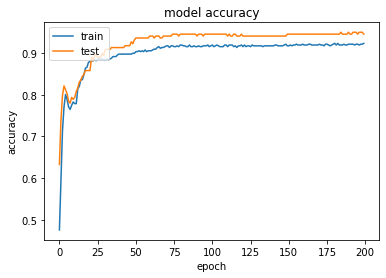

Time Taken for Training 19.09904956817627 Secs


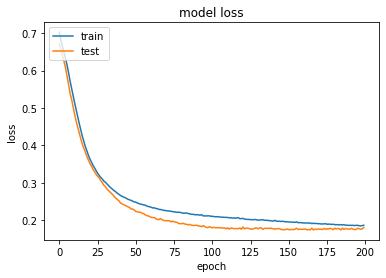

In [20]:
from time import time
start = time()
history=model.fit(x=X_data,y=Y_data,batch_size=14,epochs=200,validation_split=0.30,verbose=1)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Time= time()-start
print("Time Taken for Training "+str(Time)+" Secs")
plt.show()

In [21]:
model.save("C:\\Users\\User\\Desktop\\Estate_model\\perf.h100c")